**Every augment methods deal with gray scale images.**

Flow:

1.Convert Mask to Gray (0->0, 1->255)

2.Augmenting

3.Convert Gray back to Mask (vversa)

#Import Lib

In [48]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
import random
from matplotlib import pyplot as plt
import albumentations as albu

Mask you want to augment

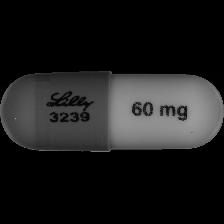

In [102]:
image_pth='/content/0002-3239_0_0.jpg'
img=cv2.imread(image_pth,0)
cv2_imshow(img)

In [117]:
def mask2gray(mask):
  img=np.where(mask==0,0,255)
  return img
def gray2mask(gray):
  img=np.where(gray==0,0,1)
  return img

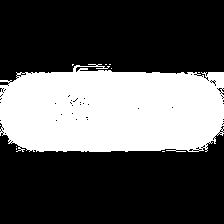

In [118]:
cv2_imshow(mask2gray(img))

#DATA AUGMENTATION

##Radom Rotate

In [23]:
def warpAffine(src, M, dsize):
  return cv2.warpAffine(src, M, dsize)
def rotate_image(image, angle):
  """
  Rotate image angle degree
  """
  (h, w) = image.shape[:2]
  (cX, cY) = (w // 2, h // 2)

  M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
  cos = np.abs(M[0, 0])
  sin = np.abs(M[0, 1])

  nW = int((h * sin) + (w * cos))
  nH = int((h * cos) + (w * sin))

  M[0, 2] += (nW / 2) - cX
  M[1, 2] += (nH / 2) - cY

  image = warpAffine(image, M, (nW, nH))

  return image

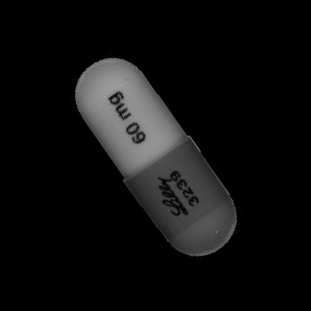

In [30]:
cv2_imshow(rotate_image(img,125))

##Flip Horizontal

In [37]:
def flip_horizontal(image):
  """
  Flip image horizontally
  """
  return image[::-1,:]

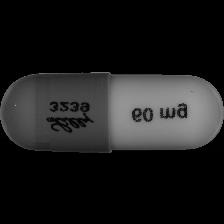

In [38]:
cv2_imshow(flip_horizontal(img))

##Flip Vertical

In [35]:
def flip_vertical(image):
  """
  Flip image vertically
  """
  return image[:,::-1]

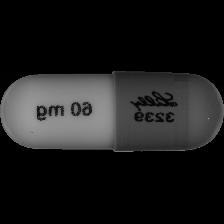

In [36]:
cv2_imshow(flip_vertical(img))

##Transpose

In [46]:
def flip_transpose(image):
  """
  Tranpose image
  """
  return image.transpose()

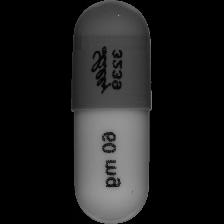

In [47]:
cv2_imshow(flip_transpose(img))

##Random Crop

In [59]:
def crop_random(image,seed):
  """
  Crop an image with random seed
  Cropped image will always be a square
  lenght of edge of a square =[miniheight,maxiheight]
  """
  miniheight=45
  maxiheight=200

  h,w=image.shape
  aug = albu.RandomSizedCrop(min_max_height=(miniheight, maxiheight), height=h, width=w, p=1)
  random.seed(seed)
  augmented = aug(image=image)
  image_scaled = augmented['image']
  return image_scaled

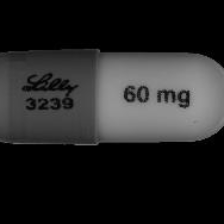

In [63]:
cv2_imshow(crop_random(img,11))

##Elastic transform

In [81]:
def elastic_transform(image,seed):
  """
  Elastic Transform with random seed
  Distort an image
  """
  aug = albu.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
  random.seed(seed)
  augmented = aug(image=image)
  image_elastic = augmented['image']
  return image_elastic

In [ ]:
cv2_imshow(elastic_transform(img,11))

##Rectangle cutout

In [98]:
def rec_cut(image, length):
  """
  Cutout a square lenght from an image 
  """
  h,w=img.shape
  y = np.random.randint(h)
  x = np.random.randint(w)

  y1 = np.clip(y - length // 2, 0, h)
  y2 = np.clip(y + length // 2, 0, h)
  x1 = np.clip(x - length // 2, 0, w)
  x2 = np.clip(x + length // 2, 0, w)
  tmp = image.copy()
  tmp[y1: y2, x1: x2] = 255
  return tmp

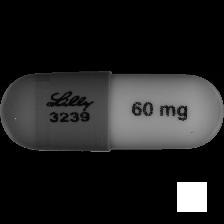

In [103]:
cv2_imshow(rec_cut(img,30))

##Circle cutout

In [104]:
def cir_cut(image, length):
  """
  Cutout a circle radius length from an image 
  """
  h,w=img.shape
  y = np.random.randint(h)
  x = np.random.randint(w)
  tmp = image.copy()
  for i in range(h):
    for j in range(w):
      if((i-y)**2+(j-x)**2)<=length**2:
        tmp[i,j]=255
  return tmp

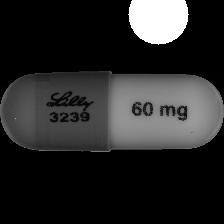

In [110]:
cv2_imshow(cir_cut(img,30))

##Convolution

In [119]:
def conv(image,kernel):
  """
  kernel: numpy array
  Convolution image with kernel
  Kernel: blur, edge, sharp,... <google>
  """
  result=cv2.filter2D(image,-1,kernel) 
  return result

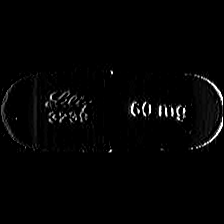

In [120]:
kernel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
cv2_imshow(conv(img,kernel))

##Dilation & Erosion

In [125]:
def dilation(image,kernel,iter):
  """
  kernel: numpy array
  Dilation image with kernel
  iteration
  """
  img_dilation = cv2.dilate(img, kernel, iterations=iter)
  return img_dilation

def erosion(image,kernel,iter):
  """
  kernel: numpy array
  Dilation image with kernel
  iteration
  """
  img_erosion = cv2.erode(img, kernel, iterations=iter)
  return img_erosion

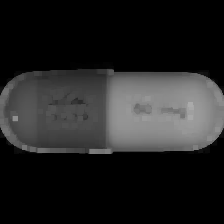

In [126]:
kernel = np.ones((5,5), np.uint8)
cv2_imshow(dilation(img,kernel,1))

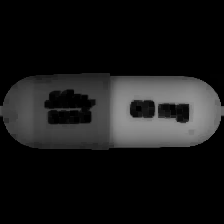

In [127]:
cv2_imshow(erosion(img,kernel,1))